In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

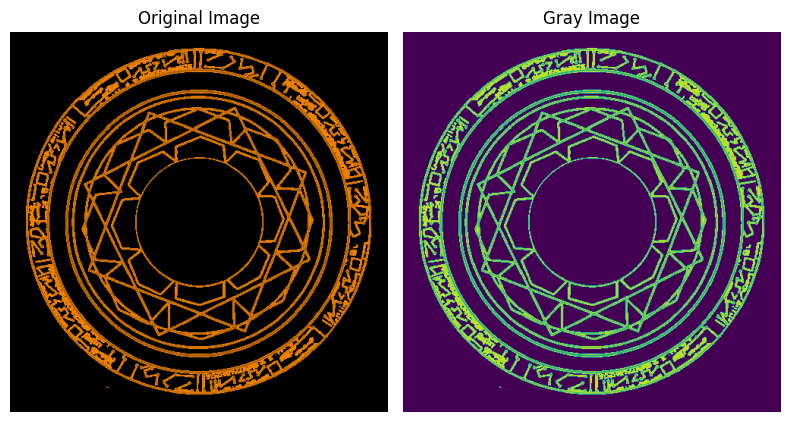

In [2]:
# img = cv2.imread('saved/rj.jpg')
img = cv2.imread('./Projects/magic_circle_cw.png')

c1_img = img.copy()
gray_img = cv2.cvtColor(c1_img,cv2.COLOR_BGR2GRAY)

fig,ax = plt.subplots(1,2,figsize=(8,8))

ax[0].imshow(img[:,:,::-1])
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(gray_img)
ax[1].set_title('Gray Image')
ax[1].axis('off')

plt.tight_layout()

Text(0.5, 1.0, 'Contours Drawn')

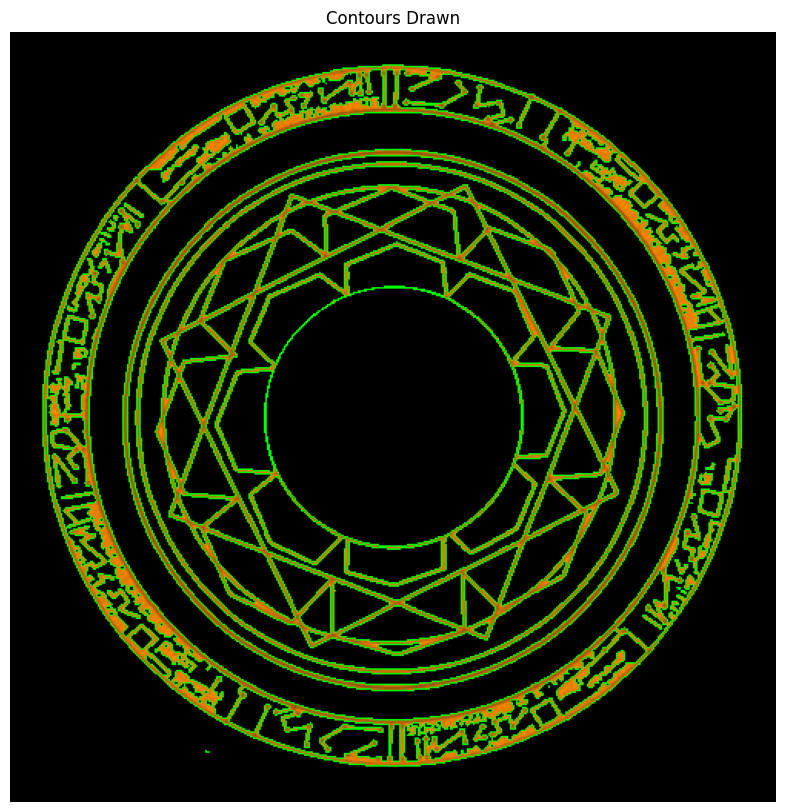

In [3]:
con,hr = cv2.findContours(gray_img,cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(c1_img, con, -1, (0,255,0), 1)

plt.figure(figsize=[10,10])
plt.imshow(c1_img[:,:,::-1])
plt.axis("off")
plt.title('Contours Drawn')


(-0.5, 497.5, 500.5, -0.5)

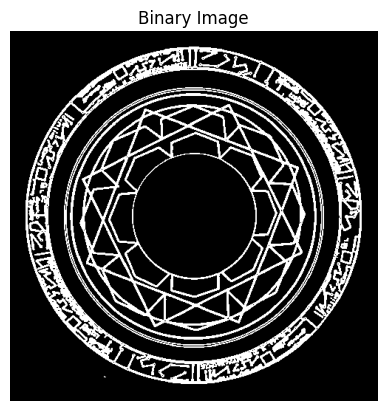

In [4]:
# Creating a binary thresholded image
_, binary = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap="gray")
plt.title("Binary Image")
plt.axis("off")


(-0.5, 497.5, 500.5, -0.5)

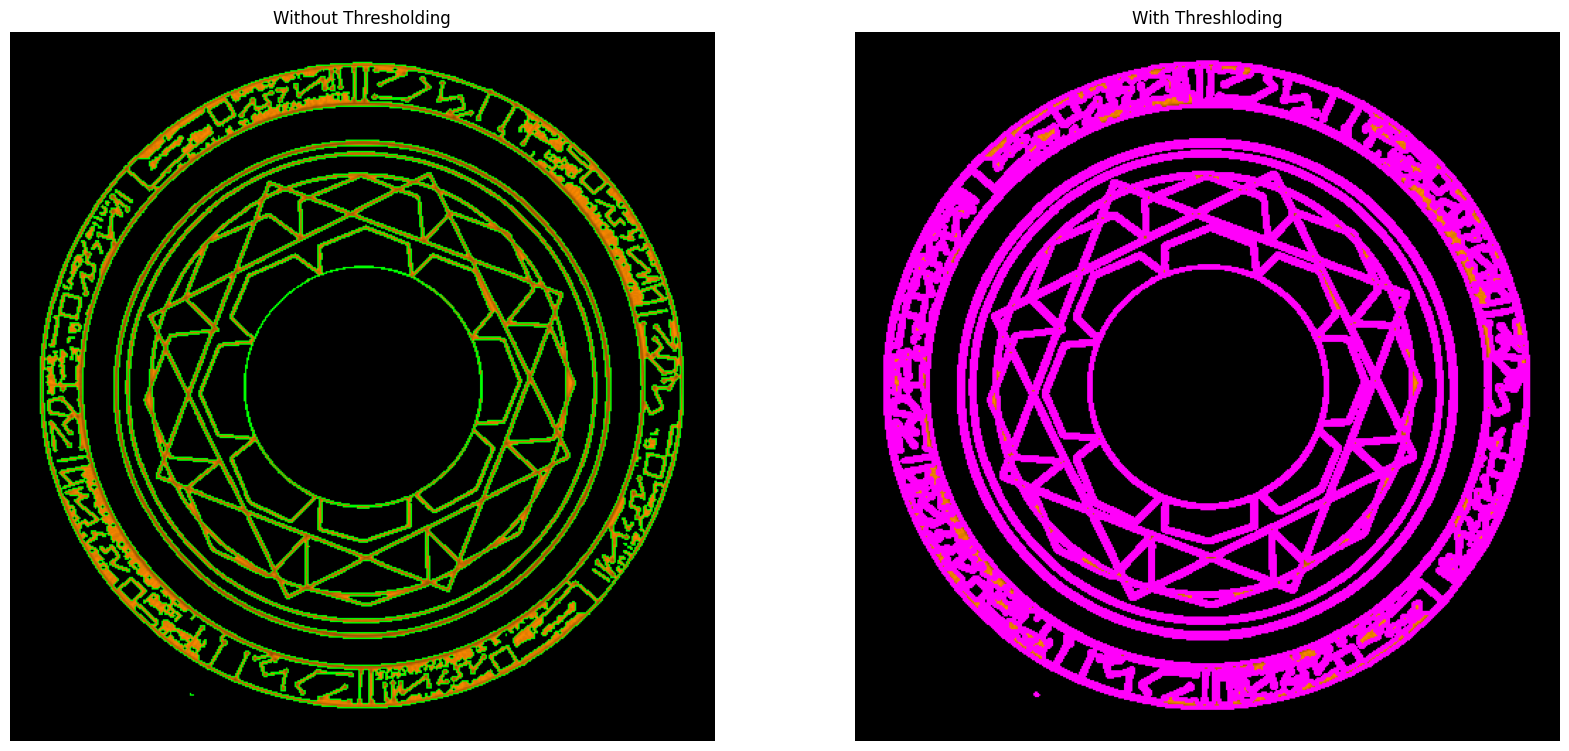

In [5]:

c2_img = img.copy()

# Finding & Drawing the contours from the binary thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

c2_img = cv2.drawContours(c2_img, contours, -1, (250, 0, 255), 2)

fig,ax = plt.subplots(1,2,figsize = (20,20))
ax[0].imshow(c1_img[:,:,::-1])
ax[0].set_title("Without Thresholding")
ax[0].axis('off')

ax[1].imshow(c2_img[:,:,::-1])
ax[1].set_title("With Threshloding")
ax[1].axis('off')


# Extracting the Largest Contour in the image

(-0.5, 497.5, 500.5, -0.5)

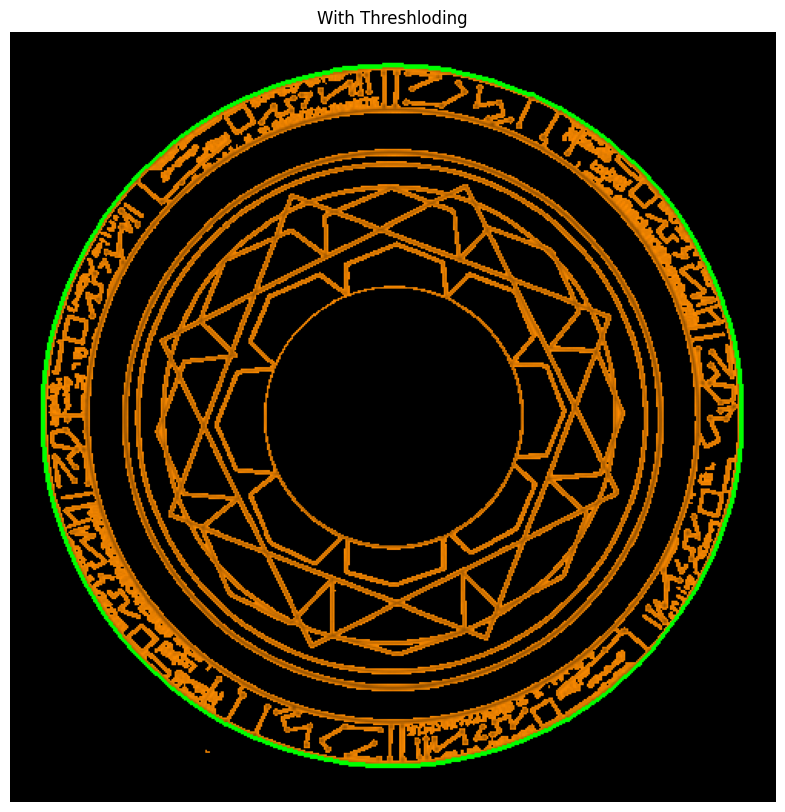

In [6]:
# img = cv2.imread('saved/rj.jpg')
img = cv2.imread('./Projects/magic_circle_cw.png')


c3_img = img.copy()

gray_c3 = cv2.cvtColor(c3_img,cv2.COLOR_BGR2GRAY)

contours, heirarchy = cv2.findContours(gray_c3,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

biggest_contour = max(contours,key=cv2.contourArea)

cv2.drawContours(c3_img,biggest_contour,-1,(0,255,0),2)

fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.imshow(c3_img[:,:,::-1])
ax.set_title("With Threshloding")
ax.axis('off')

# Sorting Contours based on the size

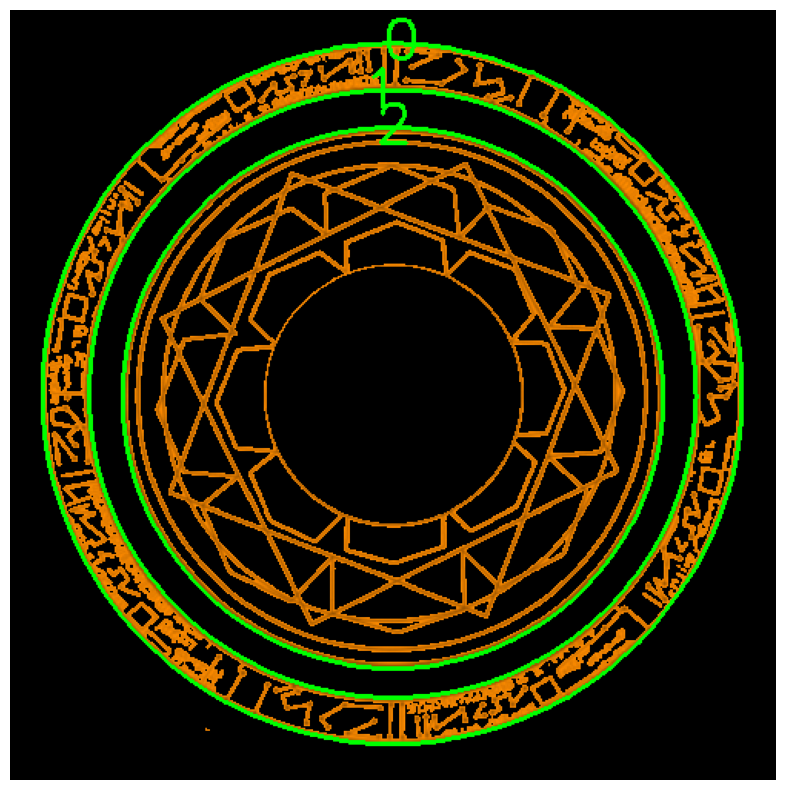

In [7]:
img = cv2.imread('saved/apple.jpg')
img = cv2.imread('./Projects/magic_circle_cw.png')


c4_img = img.copy()

gray_c4 = cv2.cvtColor(c4_img,cv2.COLOR_BGR2GRAY)

contours, heirarchy = cv2.findContours(gray_c4,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

sorted_contours = sorted(contours,key = cv2.contourArea,reverse = True)

for i, cont in enumerate(sorted_contours[0:3],-1):
    
    cv2.drawContours(c4_img,cont,-1,(0,255,0),2)
    cv2.putText(c4_img,str(int(i)+1), (cont[0,0,0], cont[0,0,1]+10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0),2)
    
plt.figure(figsize=[10,10])
plt.imshow(c4_img[:,:,::-1])
plt.axis('off')
plt.show()


# Drawing Rectangle Around the Region
#
#
(i) Straight Rectangle 
#
(ii) Rotated Rectangle 

## 1] Straight Rectangle

(-0.5, 497.5, 500.5, -0.5)

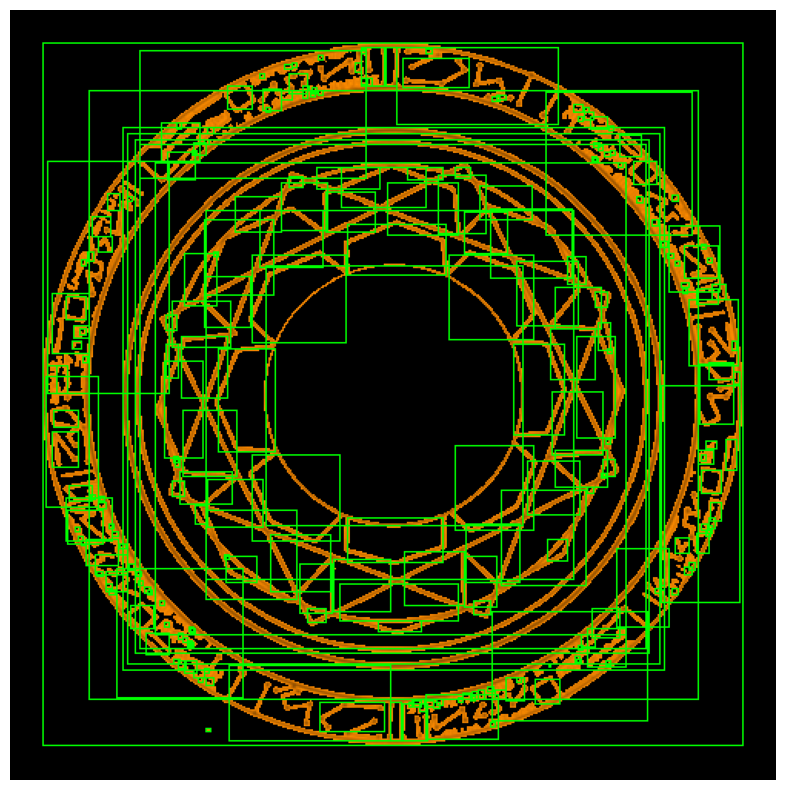

In [8]:
# img = cv2.imread('saved/tree.jpg')
img = cv2.imread('./Projects/magic_circle_cw.png')

c5_img = img.copy()

gray_c5 = cv2.cvtColor(c5_img,cv2.COLOR_BGR2GRAY)

contours, hierarchy = cv2.findContours(gray_c5, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i]) # (x,y= topleft corner x&y) ; (w,h= width , heigth)

    cv2.rectangle(c5_img, (x, y), (x+w, y+h), (0, 255, 0), 1)

plt.figure(figsize=[10,10])
plt.imshow(c5_img[:,:,::-1])
plt.axis("off")


(-0.5, 497.5, 500.5, -0.5)

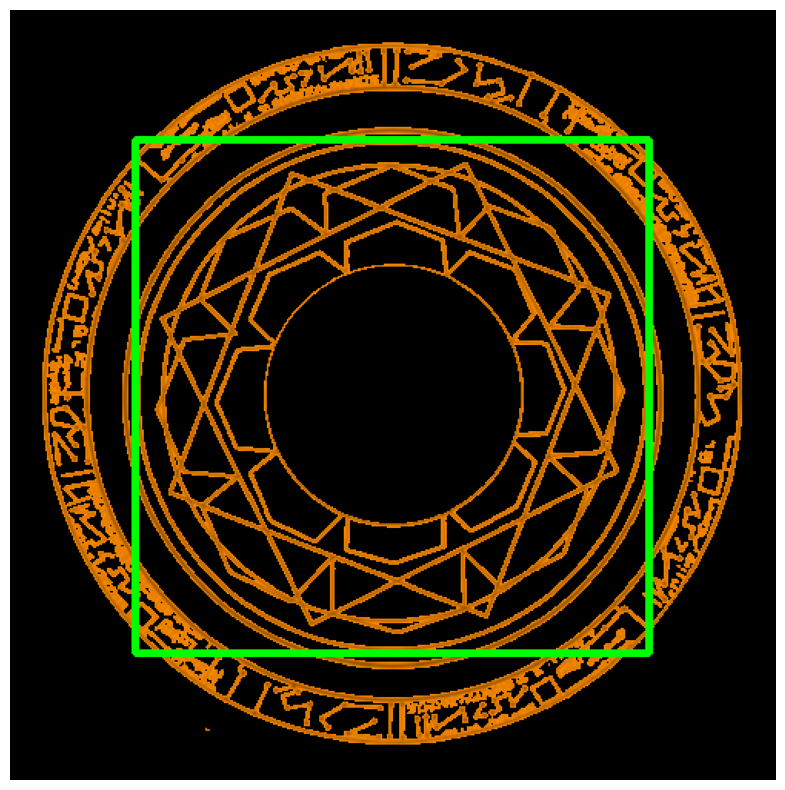

In [9]:


# img = cv2.imread('saved/tree.jpg')
img = cv2.imread('./Projects/magic_circle_cw.png')

c5_img = img.copy()

gray_c5 = cv2.cvtColor(c5_img,cv2.COLOR_BGR2GRAY)

contours, hierarchy = cv2.findContours(gray_c5, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

sorted_contours = sorted(contours,key = cv2.contourArea,reverse = True)


x, y, w, h = cv2.boundingRect(sorted_contours[4]) # (x,y= topleft corner x&y) ; (w,h= width , heigth)

cv2.rectangle(c5_img, (x, y), (x+w, y+h), (0, 255, 0), 3)

plt.figure(figsize=[10,10])
plt.imshow(c5_img[:,:,::-1])
plt.axis("off")


## 2] Rotated Rectangle

(-0.5, 497.5, 500.5, -0.5)

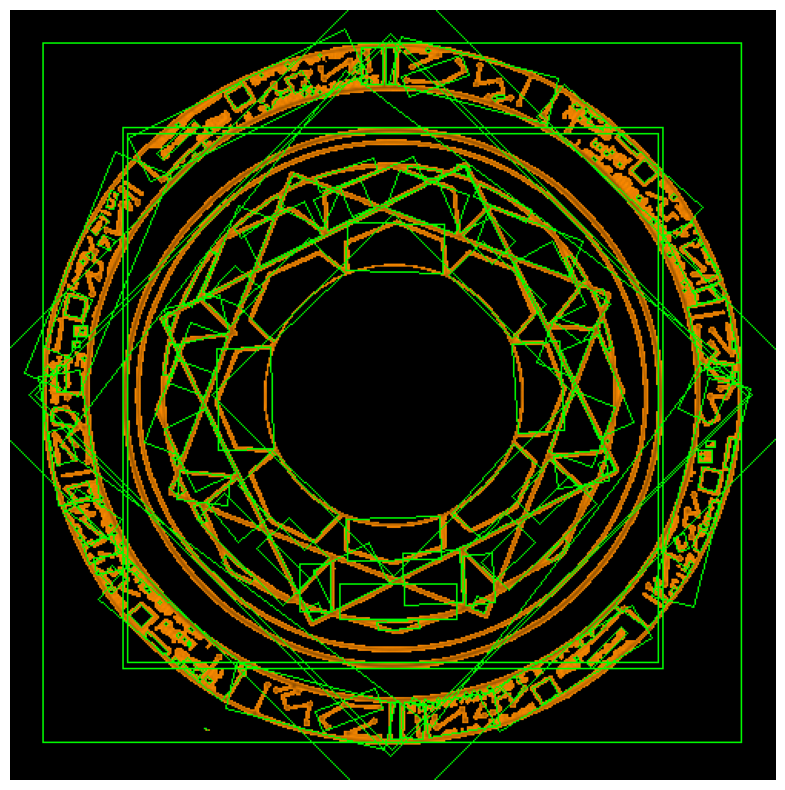

In [10]:
# img = cv2.imread('saved/tree.jpg')
img = cv2.imread('./Projects/magic_circle_cw.png')

c6_img = img.copy()

gray_c6 = cv2.cvtColor(c6_img,cv2.COLOR_BGR2GRAY)

contours, hierarchy = cv2.findContours(gray_c6, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)


# print(rect)
for i in range(len(contours)):
    rect = cv2.minAreaRect(contours[i])
    box =  cv2.boxPoints(rect).astype('int')

    cv2.drawContours(c6_img,[box],0,(0,255,0),1)

plt.figure(figsize=[10,10])
plt.imshow(c6_img[:,:,::-1])
plt.axis("off")


(-0.5, 497.5, 500.5, -0.5)

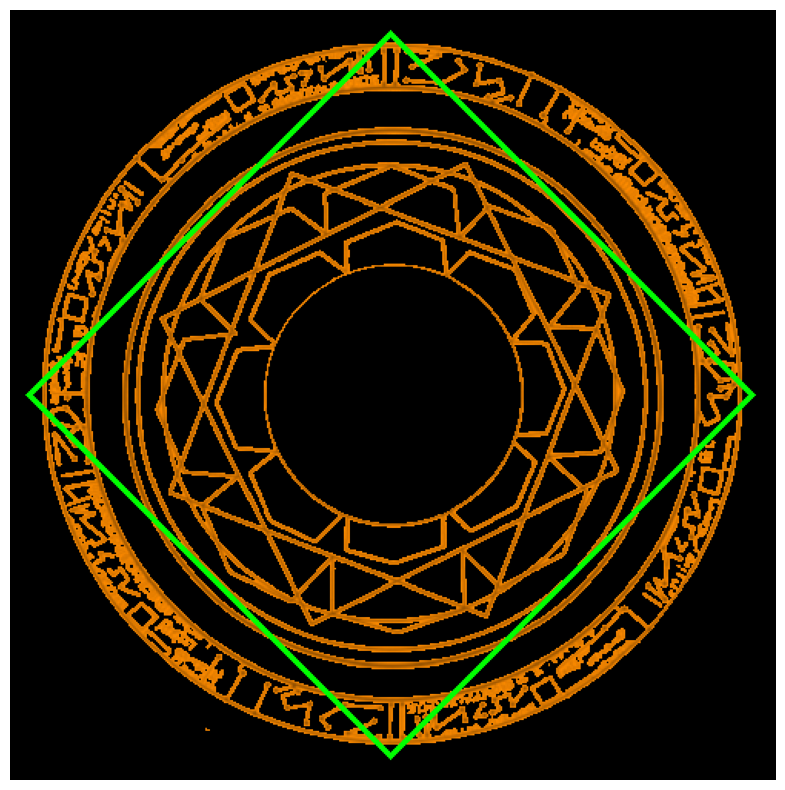

In [11]:

# img = cv2.imread('saved/tree.jpg')
img = cv2.imread('./Projects/magic_circle_cw.png')

c6_img = img.copy()

gray_c6 = cv2.cvtColor(c6_img,cv2.COLOR_BGR2GRAY)

contours, hierarchy = cv2.findContours(gray_c6, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

sorted_contours = sorted(contours,key = cv2.contourArea,reverse = True)

# print(rect)
rect = cv2.minAreaRect(sorted_contours[4])
box =  cv2.boxPoints(rect).astype('int')

cv2.drawContours(c6_img,[box],0,(0,255,0),3)

plt.figure(figsize=[10,10])
plt.imshow(c6_img[:,:,::-1])
plt.axis("off")


#### Straight vs Rotated Rectangle

#### sorted_contours = sorted(contours,key = cv2.contourArea,reverse = True)
#### 
#### for same sorted_contours[i] we may get different rectangled contours based on the angle
#### 

#
#
#
# Drawing Convex Hull

In [15]:
img = cv2.imread('saved/tree.jpg')
img = cv2.imread('./Projects/magic_circle_cw.png')

hull_img = img.copy()
c7_img = img.copy()

gray_c7 = cv2.cvtColor(c7_img,cv2.COLOR_BGR2GRAY)


In [20]:
# COnverting to binary ( threshold )
_, binary = cv2.threshold(gray_c7,230,255,cv2.THRESH_BINARY_INV)

contours, heirarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

sorted_contours = sorted(contours,key = cv2.contourArea,reverse = True)

cnt = sorted_contours[0]
hull = cv2.convexHull(cnt)

cv2.drawContours(hull_img, [hull], 0 , (0,0,0), 2) 
cv2.drawContours(c7_img, [cnt], 0, (0,0,0), 2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

(-0.5, 497.5, 500.5, -0.5)

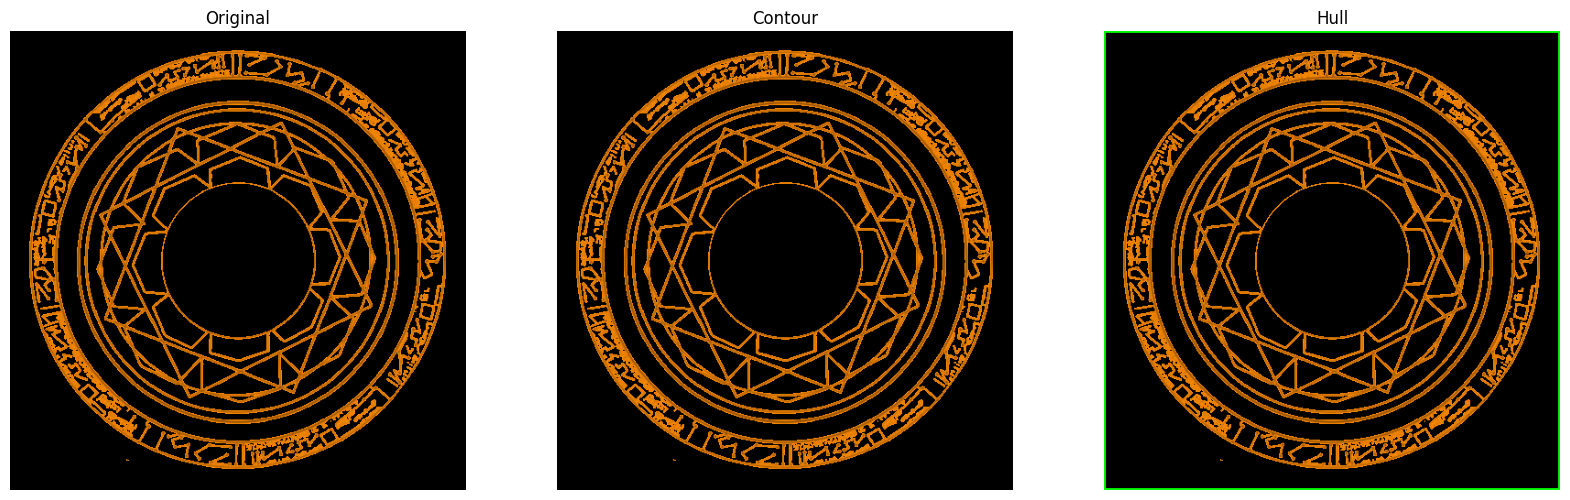

In [21]:
fig , ax = plt.subplots(1,3,figsize=(20,20))

ax[0].imshow(img[:,:,::-1])
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(c7_img[:,:,::-1])
ax[1].set_title('Contour')
ax[1].axis('off')

ax[2].imshow(hull_img[:,:,::-1])
ax[2].set_title('Hull')
ax[2].axis('off')


